# Hypothesis Testing - Numerical Datasets

#### Main question we are trying to answer is "Is this difference real?" but converted to a statistical question - "What is probability that difference I am observing is by chance?"

## Goal: 
#### Reject the null hypothesis when the two populations being compared are identical and the differences observed are due to chance. We reject the null hypothesis by proving that what we observed is unlikely. We do that by calculating the p-value (using a hypothesis test). We generally want p < 0.05 (i.e., there’s only a 5% chance that two identical distributions could have produced these results)

## How to start:

### First we should know answer to below two questions -
* Is my data categorical or numerical?
* How many samples am I comparing?

### Use the below cheat sheet for the hypothesis testing -

#####  Numerical Dat & Sample versus known quantity or target Comparison 
* 1 Sample T test

##### Numerical Dat & 2 Samples Comparison 
* 2 Sample T test

##### Numerical Dat & More than 2 samples Comparison 
* ANOVA or Tukey

##### Categorical Dat & Sample versus known quantity or target Comparison 
* Binomial test

##### Categorical Dat & 2 Samples Comparison  
* Chi Square test

##### Categorical Dat & More than 2 Samples Comparison  
* Chi Square test

## 1. 1 Sample T test

#### When to Use?
Use this when you are comparing against known target like a statistic from published paper or a target specified.

#### What question does it answer?
It compares a sample mean to a hypothetical population mean. It answers the question - What is the probability that a sample came from a distribution with a desired mean?

In [13]:
from scipy.stats import ttest_1samp
import numpy as np
import pandas as pd


ages = np.array([32, 34,  29 , 29,  22 ,39 , 38,  37,  38,  36,  30,  26,  22,  22])
#print(ages)
#type(ages)
ages = pd.DataFrame(ages)
print(ages)

     0
0   32
1   34
2   29
3   29
4   22
5   39
6   38
7   37
8   38
9   36
10  30
11  26
12  22
13  22


In [15]:
ages_mean = np.mean(ages)
print(ages_mean)

0    31.0
dtype: float64


We expect mean to be 30. Using 1 sample t test now we find the probability that this sample data distribution belongs to the distribution whose mean in 30. 

In [17]:
tstat, pval = ttest_1samp(ages,30)
print(pval)

[ 0.56051559]


There is a probability of 56% that this sample belongs to the distribution of population whose mean is 30. This percent is high so we cannot reject the null hypothesis that mean of population is 30. 

## 2. 2 Sample T test

#### When to Use?
Use this when you are comparing 2 samples with each other and both samples have normal distribution approximately. Use this when comparing two numerical distributions. Null hypothesis is that the two distributions have same mean.

#### What question does it answer?
It compares 1 sample mean to another sample's mean. It answers the question - What is the probability that both samples belong to same population?

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

* Important Note: Use seaborn and matplotlib to plot the sample datas. Before performing 2 sample t test, it is good idea to plot histograms of two samples over each other to visualize if the mean is same & to verify the normal distribution assumption of the t test. Other way would be to plot violin graph which is histogram plotted horizontally along with its mirror image. Below we can see dinner and lunch tips sample plotted besides each other. 
We see Dinner mean tip is higher than lunch mean tip. Now, we can perform hypothesis testing to check its significance. 

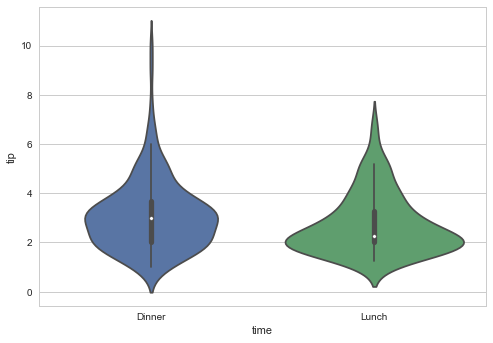

In [29]:
tips = sns.load_dataset("tips")
ax =  sns.violinplot(x="time", y="tip", data=tips, order=["Dinner", "Lunch"])

plt.show()

In [56]:
D = tips[tips['time']=="Dinner"]
L = tips[tips['time']=="Lunch"]
D = D['tip']
L = L['tip']
D_mean = np.mean(D)
L_mean = np.mean(L)
D_std = np.std(D)
L_std = np.std(L)
print(D_mean)
print(D_std)
print(L_mean)
print(L_std)

3.102670454545454
1.4321567589858604
2.7280882352941176
1.1964497203773352


In [58]:
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(D, L)
print(pval)

0.0578015347517


Lets use 95% confidence interval. 
Probability that two samples have same mean is 5.7% which is not in critical region of 0 to 5%. Hence we cannot reject the null hypothesis.  

## 3. Multiple Sample Comparisons - ANOVA test

#### When to Use?
ANOVA compares more than 2 numerical datasets without increasing the probability of a false positive.
In order to use ANOVA,
1. The samples should be ~ normally distributed
2. The standard deviations of the data should be somewhat similar
3. The samples should be independent

#### What question does it answer?
It compares 1 sample mean to other multiple sample's mean. It answers the question - What is the probability that several samples belong to same population? 
This test will tell 1 of the distribution is different but not which distribution is different. To know which one is different we need another hypothesis test called Tukey's test.

In [59]:
import scipy.stats as stats

In [76]:
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835,0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]


In [74]:
import plotly
plotly.__version__
import plotly.plotly as py
import plotly.tools as tls

import pylab as plt

fig = plt.figure()

tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835,0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

n, bins, patches = plt.hist([tillamook,newport,petersburg,magadan,tvarminne])
plt.hist(tillamook, bins, alpha=0.5)
plt.hist(newport, bins, alpha=0.5)
plt.hist(petersburg, bins, alpha=0.5)
plt.hist(magadan, bins, alpha=0.5)
plt.hist(tvarminne, bins, alpha=0.5)

plotly_fig = tls.mpl_to_plotly( fig )
py.iplot(plotly_fig, filename='mpl-multi-histogram')

In [75]:
stats.f_oneway(tillamook, newport, petersburg, magadan, tvarminne)

F_onewayResult(statistic=7.1210194716424473, pvalue=0.00028122423145345439)

p value is very small that means probability that all samples' have equal means is low - so we can reject the null hypothesis that all samples are equal using this f test. To determine which sample is different we perform Tukey test next.

In [106]:
v = np.concatenate([tillamook, newport, petersburg, magadan, tvarminne])

labels = ['tillamook']*len(tillamook) +['newport']*len(newport) + ['petersburg']*len(petersburg) + ['magadan']*len(magadan) +['tvarminne']*len(tvarminne)

tukey_results = pairwise_tukeyhsd(v,labels,0.05)
print(tukey_results)

  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
  group1     group2   meandiff  lower   upper  reject
-----------------------------------------------------
 magadan    newport   -0.0032  -0.0213  0.0149 False 
 magadan   petersburg  0.0254   0.0067  0.0442  True 
 magadan   tillamook   0.0022   -0.015  0.0194 False 
 magadan   tvarminne   0.0177  -0.0019  0.0373 False 
 newport   petersburg  0.0286   0.0099  0.0474  True 
 newport   tillamook   0.0054  -0.0118  0.0226 False 
 newport   tvarminne   0.0209   0.0013  0.0405  True 
petersburg tillamook  -0.0232  -0.0411 -0.0054  True 
petersburg tvarminne  -0.0077  -0.0279  0.0124 False 
tillamook  tvarminne   0.0155  -0.0032  0.0342 False 
-----------------------------------------------------


magadan & newport are different from petersburg; newport & tvarminne and
petersburg & tillamook are also different from each other.

## ANOVA & Tukey Test

In [87]:
import pandas as pd
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
    
import matplotlib.pyplot as plt

# Loading data
df = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/difficile.csv")
df.drop('person', axis= 1, inplace= True)

# Recoding value from numeric to string
df['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace= True)
    
# Gettin summary statistics
(df['libido']).describe()

count    15.000000
mean      3.466667
std       1.767430
min       1.000000
25%       2.000000
50%       3.000000
75%       4.500000
max       7.000000
Name: libido, dtype: float64

In [88]:
(df['libido'].groupby(df['dose'])).describe()

dose          
high     count    5.000000
         mean     5.000000
         std      1.581139
         min      3.000000
         25%      4.000000
         50%      5.000000
         75%      6.000000
         max      7.000000
low      count    5.000000
         mean     3.200000
         std      1.303840
         min      2.000000
         25%      2.000000
         50%      3.000000
         75%      4.000000
         max      5.000000
placebo  count    5.000000
         mean     2.200000
         std      1.303840
         min      1.000000
         25%      1.000000
         50%      2.000000
         75%      3.000000
         max      4.000000
Name: libido, dtype: float64

In [91]:
stats.f_oneway(df['libido'][df['dose'] == 'high'], 
             df['libido'][df['dose'] == 'low'],
             df['libido'][df['dose'] == 'placebo'])

F_onewayResult(statistic=5.1186440677966099, pvalue=0.024694289538222603)

The F-statistic= 5.119 and the p-value= 0.025 which is indicating that there is an overall significant effect of medication on libido. However, we don’t know where the difference between dosing/groups is yet. 

In [92]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['libido'], df['dose'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1  group2 meandiff  lower   upper  reject
----------------------------------------------
 high    low     -1.8   -4.1651  0.5651 False 
 high  placebo   -2.8   -5.1651 -0.4349  True 
 low   placebo   -1.0   -3.3651  1.3651 False 
----------------------------------------------


Placebo is different from high dose.

The Tukey HSD post-hoc comparison test controls for type I error and maintains the familywise error rate at 0.05 (FWER= 0.05 top of the table). The group1 and group2 columns are the groups being compared, the meandiff column is the difference in means of the two groups being calculated as group2 – group1, the lower/upper columns are the lower/upper boundaries of the 95% confidence interval, and the reject column states whether or not the null hypothesis should be rejected. 

If we want to determine the tstatistic and p value for the difference in the groups, we need to first determine the cut off or corrected p value. 

### Bonferroni Correction comparison

The corrected p-value can be calculated using the formula:
p-value/# of comparison

In this case it would be: 0.05/3 = 0.01667

Now the t-tests that are conducted should have a p-value less than 0.01667 in order to be considered significant.

In [98]:
stats.ttest_ind(df['libido'][df['dose'] == 'high'], df['libido'][df['dose'] == 'low'])

Ttest_indResult(statistic=1.963961012123931, pvalue=0.08513507177899203)

In [99]:
stats.ttest_ind(df['libido'][df['dose'] == 'low'], df['libido'][df['dose'] == 'placebo'])

Ttest_indResult(statistic=1.2126781251816647, pvalue=0.25984504521378449)

In [100]:
stats.ttest_ind(df['libido'][df['dose'] == 'high'], df['libido'][df['dose'] == 'placebo'])

Ttest_indResult(statistic=3.0550504633038926, pvalue=0.015700141250047695)

Using the Bonferroni correction, only the difference between the high dose and placebo groups are significantly different. 

#### Check assumptions:
##### Assumption1 : Homogeneity of Variance

In [93]:
stats.levene(df['libido'][df['dose'] == 'placebo'],
             df['libido'][df['dose'] == 'low'],
             df['libido'][df['dose'] == 'high'])

LeveneResult(statistic=0.11764705882352934, pvalue=0.8900225182757423)

Reference: https://pythonfordatascience.org/anova-python/

Levene’s test for homogeneity of variance is not significant which indicates that the groups have equal variances.

##### Assumption2 : Normality

In [97]:
results = ols('libido ~ C(dose)', data=df).fit()
results.summary()
stats.shapiro(results.resid)

/Users/dhanashreepokale/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1327: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=15



(0.916691780090332, 0.1714704930782318)

The results from the Shapiro-Wilk test is not statistically significant which indicates that the residuals are normally distributed.